In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(df_22['Prices'])
plt.title("Rental prices Distribution")
plt.xlabel('Prices($)')
plt.ylabel('Density(%)')
plt.show()

In [ ]:
numeric_features = ['Prices', 'Bedrooms', 'Bathrooms', 'Parkings', 'Postcode', 'Longitude',
                   'Latitude', 'popu2022','Mean Income2022','hos_count','stop_count','school_count'
                   ,'distance']
corr_ = df_22[numeric_features].corr()
corr_

plt.figure(figsize = (20,11))
sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

In [81]:
df = pd.read_csv('../data/curated/final_df.csv')
df_22 = df.drop(['Unnamed: 0', 'name', 'geometry', 'Postcode', 'SA2_code', 
                'popu2025', 'Mean Income2025', 'hos_count','stop_count','school_count',
                 'pct'],  axis = 1)
df_25 = df.drop(['Unnamed: 0', 'name', 'geometry', 'Postcode', 'SA2_code', 
                'popu2022', 'Mean Income2022'],  axis = 1)

In [82]:
df_22_X = df_22.drop('Prices', axis = 1)
df_22_y = df_22['Prices'].to_frame()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_22_X, df_22_y, test_size=0.2)

In [84]:
para_M = MLPRegressor(activation = 'tanh', alpha= 0.05, hidden_layer_sizes= (20,), 
                       learning_rate= 'adaptive', solver= 'adam', max_iter=5000).fit(X_train, y_train)
Y_train_predicted_win = para_M.predict(X_train)
Y_train_predicted_win

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([387.02183636, 387.02183636, 387.02183636, ..., 387.02183636,
       387.02183636, 387.02183636])

In [85]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

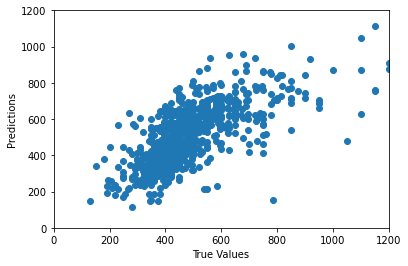

In [86]:
plt.scatter(y_test, predictions)
plt.axis([0, 1200, 0, 1200])
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [87]:
model.score(X_test, y_test)

0.3278509878064263

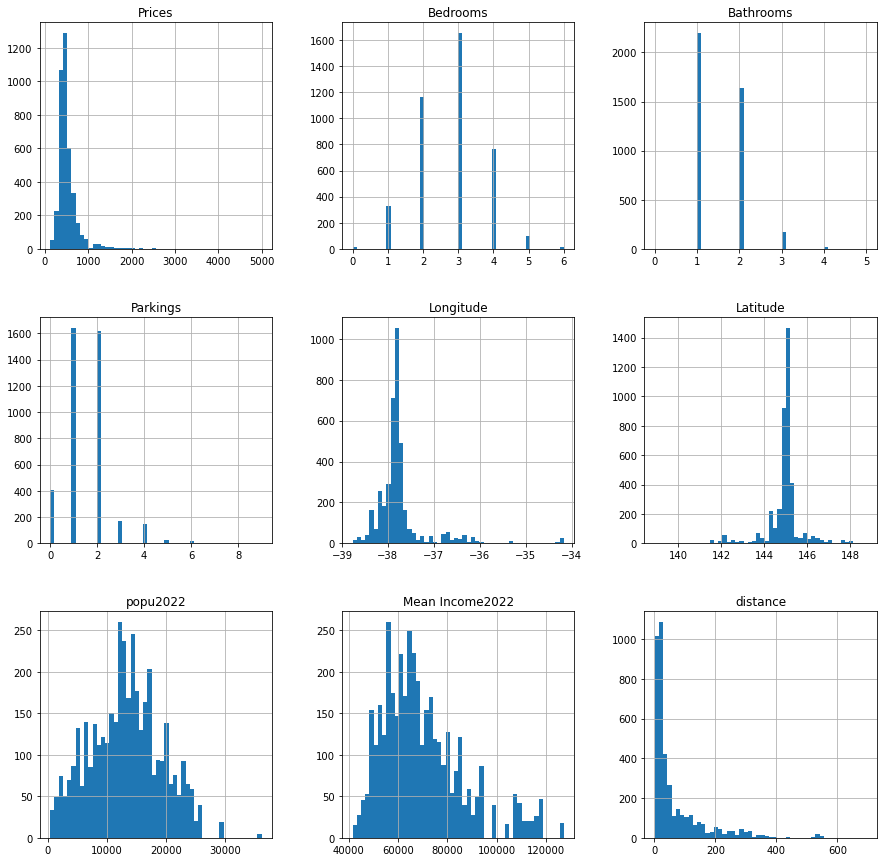

In [88]:
df_22.hist(bins=50, figsize=(15,15))
plt.show()

In [96]:
clf = MLPRegressor(solver='adam',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=0.0001,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 30, 10), 
                   activation='relu', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   learning_rate='adaptive',
                   random_state=42).fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.11159448173984488
0.06349678434680706


In [90]:
clf.score(X_train, y_train)

-2.220446049250313e-16

In [92]:
import time
%time

gs = MLPRegressor(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(gs, parameter_space, n_jobs=-1, cv=5)
clf = clf.fit(X_train, y_train) 

print('Best parameters found:\n', clf.best_params_)


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.37461494e-03 -2.96582921e+00 -2.52658942e-03 -2.96457651e+00
  3.07652562e-03 -2.86265095e+00 -1.33473164e-03 -2.85123704e+00
 -2.80492385e-03 -2.96182032e+00 -2.53167419e-03 -2.97179567e+00
 -1.88678635e-04 -2.87062455e+00 -6.80643853e-04 -2.86158757e+00
             nan  1.02795129e-01             nan  1.11821110e-01
 -2.46229206e+73  9.57035882e-02 -5.28819987e+23 -1.58713938e-02
             nan  1.06713770e-01             nan  8.61861077e-02
 -4.58646043e+22  5.19095261e-02 -6.32209913e+22  8.57431032e-02]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [97]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 0         0
name               0
pct                0
school_count       0
stop_count         0
hos_count          0
Mean Income2025    0
Mean Income2022    0
popu2025           0
popu2022           0
Latitude           0
Longitude          0
SA2_code           0
geometry           0
Parkings           0
Bathrooms          0
Bedrooms           0
Prices             0
Postcode           0
distance           0
dtype: int64

In [103]:
from sklearn.preprocessing import MinMaxScaler
minMaxNorm = MinMaxScaler()
minMaxNorm.fit(df_22_X)

MinMaxScaler()

In [104]:
X = minMaxNorm.transform(df_22_X) 
Y = df_22["Prices"]


In [108]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 0)
models_summary = pd.DataFrame([],
                              columns=['model_name', 
                                       'prediction_score',
                                       'mean_absolute_error'
                                      ])
models_summary

,model_name,prediction_score,mean_absolute_error


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(train_X, train_Y)
lr_model_predicted = lr_model.predict(test_X)
lr_model_predicted
lr_model_score = lr_model.score(test_X, test_Y )
lr_model_score

0.34006935033970964

In [111]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
RFRModel.fit(train_X, train_Y)

RFRModel_predicted = RFRModel.predict(test_X)
RFRModel_score = RFRModel.score(test_X, test_Y)
RFRModel_score


0.42155480277884194

In [116]:
mae = mean_absolute_error(test_Y, lr_model_predicted)
models_summary = models_summary.append({
    'model_name': lr_model.__class__.__name__,
    'prediction_score': lr_model_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

In [114]:
from sklearn.tree import DecisionTreeRegressor
Dtree_model = DecisionTreeRegressor(random_state=1)
Dtree_model.fit(train_X, train_Y)
Dtree_model_predicted = Dtree_model.predict(test_X)
Dtree_model_score = Dtree_model.score(test_X, test_Y)
Dtree_model_score

0.24087440651543535

In [117]:
mae = mean_absolute_error(Dtree_model_predicted, test_Y)
models_summary = models_summary.append({
    'model_name': Dtree_model.__class__.__name__,
    'prediction_score': Dtree_model_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)

,model_name,prediction_score,mean_absolute_error
0,RandomForestRegressor,0.421555,91.447688
2,LinearRegression,0.340069,117.974103
1,DecisionTreeRegressor,0.240874,109.063705
3,DecisionTreeRegressor,0.240874,109.063705


In [112]:
mae = mean_absolute_error(RFRModel_predicted, test_Y)
models_summary = models_summary.append({
    'model_name': RFRModel.__class__.__name__,
    'prediction_score': RFRModel_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)
 

,model_name,prediction_score,mean_absolute_error
0,RandomForestRegressor,0.421555,91.447688


In [118]:
    
# Creating Model
ADB_model = AdaBoostRegressor()

# Model Fitting
ADB_model.fit(train_X, train_Y)

# Model Prediction
ADB_model_predicted = ADB_model.predict(test_X)

# Model Score
ADB_model_score = ADB_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, ADB_model_predicted)
models_summary = models_summary.append({
    'model_name': ADB_model.__class__.__name__,
    'prediction_score': ADB_model_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)

,model_name,prediction_score,mean_absolute_error
0,RandomForestRegressor,0.421555,91.447688
2,LinearRegression,0.340069,117.974103
1,DecisionTreeRegressor,0.240874,109.063705
3,DecisionTreeRegressor,0.240874,109.063705
4,AdaBoostRegressor,-0.056065,212.957537


In [120]:
!pip install xgboost
from xgboost import XGBRegressor

XGBR_model = XGBRegressor()

XGBR_model.fit(train_X, train_Y)
XGBR_model_predicted = XGBR_model.predict(test_X)

XGBR_model_score = XGBR_model.score(test_X, test_Y)
XGBR_model_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 503.0 kB/s eta 0:00:0000:0100:01


0.42974881431381085

In [121]:
mae = mean_absolute_error(test_Y, XGBR_model_predicted)


models_summary = models_summary.append({
    'model_name': XGBR_model.__class__.__name__,
    'prediction_score': XGBR_model_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)
 

,model_name,prediction_score,mean_absolute_error
5,XGBRegressor,0.429749,90.749802
0,RandomForestRegressor,0.421555,91.447688
2,LinearRegression,0.340069,117.974103
1,DecisionTreeRegressor,0.240874,109.063705
3,DecisionTreeRegressor,0.240874,109.063705
4,AdaBoostRegressor,-0.056065,212.957537


In [122]:
df

,Unnamed: 0,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,Longitude,Latitude,popu2022,popu2025,Mean Income2022,Mean Income2025,hos_count,stop_count,school_count,pct,distance
0,0,1/62 Simpson St East Melbourne VIC 3002,3002,395.0,1,1,0,POINT (144.9891076 -37.8106659),206041119,-37.810666,144.989108,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.00,2.640393
1,1,29/8 Wellington Crescent East Melbourne VIC 3002,3002,750.0,2,2,2,POINT (144.9776702 -37.8172238),206041119,-37.817224,144.977670,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.00,2.127094
2,2,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,-37.810043,144.985531,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.00,2.317094
3,3,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,-37.817100,144.976716,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.00,1.993894
4,4,9/322 Albert Street East Melbourne VIC 3002,3002,990.0,3,2,1,POINT (144.9802739 -37.8098404),206041119,-37.809840,144.980274,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.00,1.863595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,4028,43 Bellman Avenue Clyde VIC 3978,3978,450.0,3,2,2,POINT (145.3401184 -38.1237646),212031303,-38.123765,145.340118,15847.256844,26078.457889,71382.469390,79738.921375,0.0,0.0,4.0,0.75,55.767144
4029,4029,11 Bonfire Way Cranbourne South VIC 3977,3977,450.0,3,2,1,POINT (145.2305706 -38.1311114),212031304,-38.131111,145.230571,23184.689777,27207.057756,59706.852893,65347.627829,3.0,0.0,3.0,1.00,53.621150
4030,4030,2 Creekview Way Cranbourne West VIC 3977,3977,500.0,4,2,2,POINT (145.2538591 -38.1022116),212031304,-38.102212,145.253859,23184.689777,27207.057756,59706.852893,65347.627829,3.0,0.0,3.0,1.00,51.263857
4031,4031,214 Evans Road Cranbourne West VIC 3977,3977,400.0,3,2,2,POINT (145.2565452 -38.0904503),212031304,-38.090450,145.256545,23184.689777,27207.057756,59706.852893,65347.627829,3.0,0.0,3.0,1.00,48.481165
